In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


from numpy import genfromtxt

from ripser import ripser, Rips
from DGMTools import *

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import SpectralEmbedding

from sklearn import manifold

from scipy.spatial.distance import directed_hausdorff

import time

In [2]:
track_name = 'CA1_6_1D_NB_track.csv'
fine_name = 'CA1_6_1D_NB_fine_cells_copy.csv'

In [3]:
track = genfromtxt(track_name, delimiter=',')
fine = genfromtxt(fine_name, delimiter=',')

In [4]:
fine_no_time = fine[:,1:]

In [5]:
def get_max_ind(arr, half_window = 50, factor = 5 ):
    greatest = arr.max()
    
    ind_list = []
    
    for i in range(half_window, len(arr)-half_window,1):
        if np.argmax(arr[i-half_window:i+half_window]) == half_window :

            if arr[i] > greatest / factor:
                ind_list.append(i)
            
    ind = np.unique(ind_list)
    
    return ind

In [6]:
phi = np.linspace(0, 2*np.pi, 10**3)
x = np.cos(phi)
y = np.sin(phi)

/home/daria/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


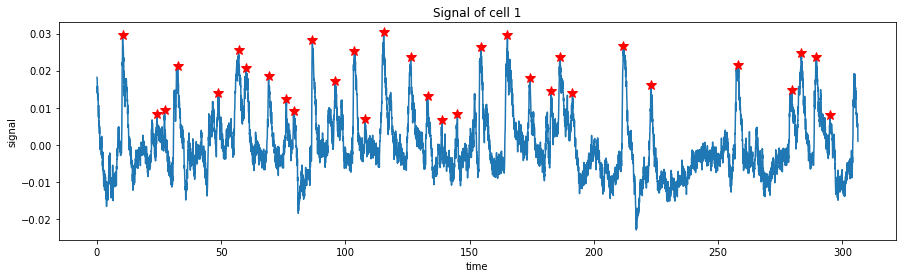

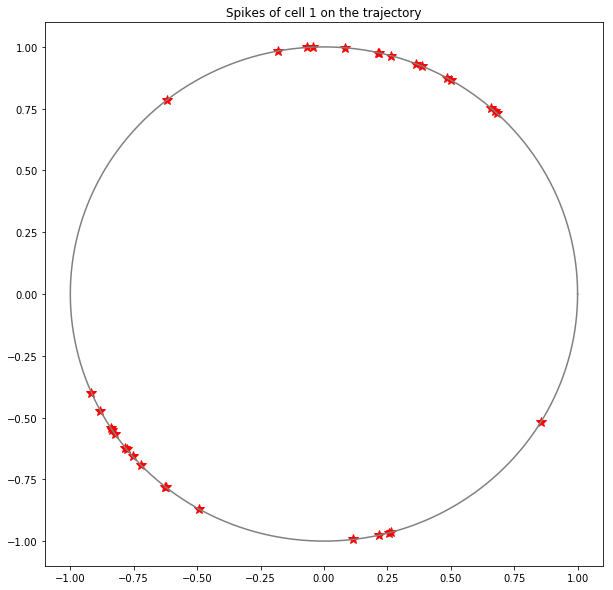

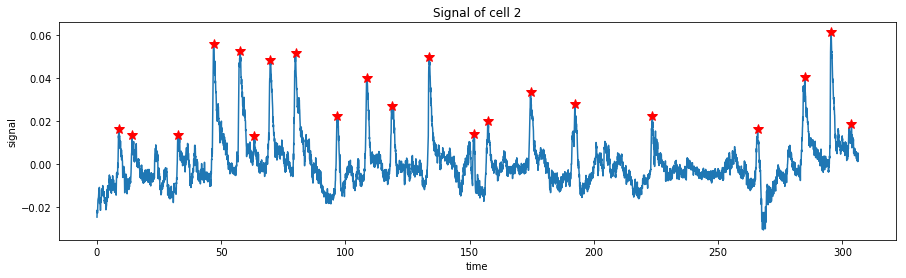

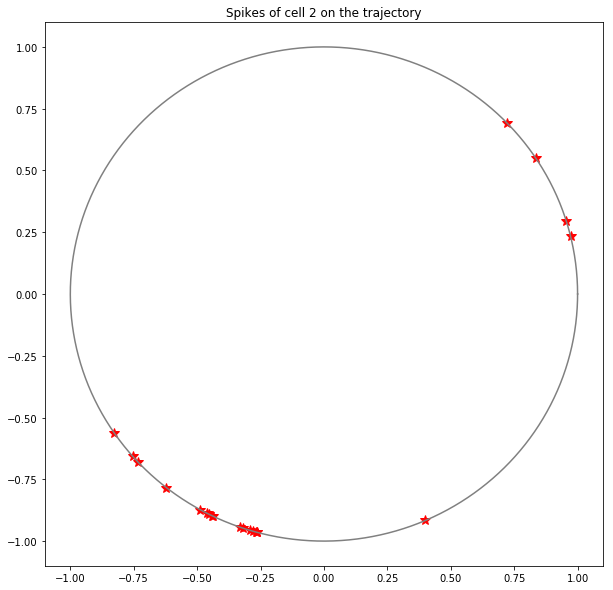

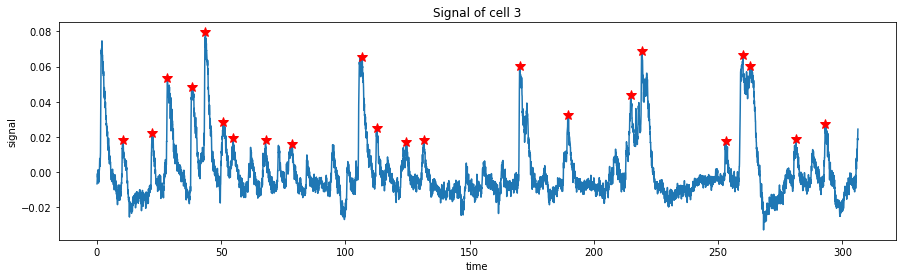

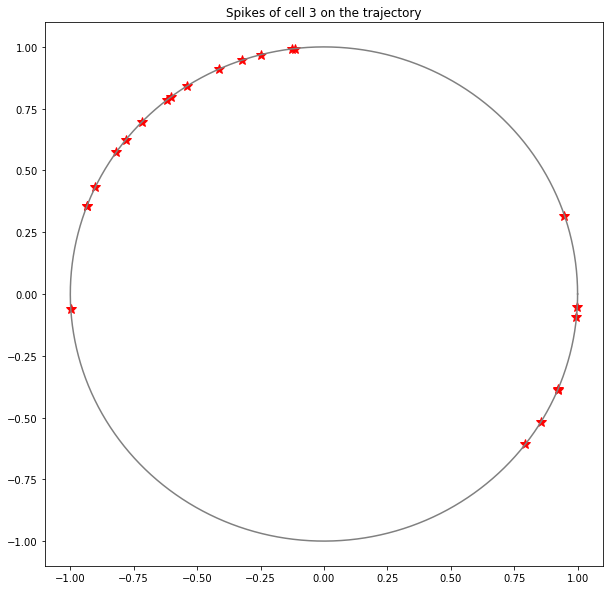

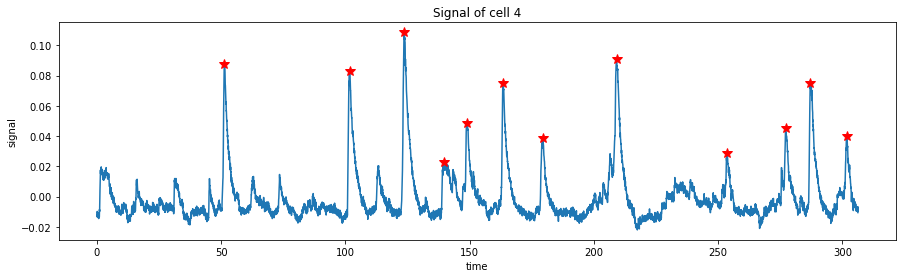

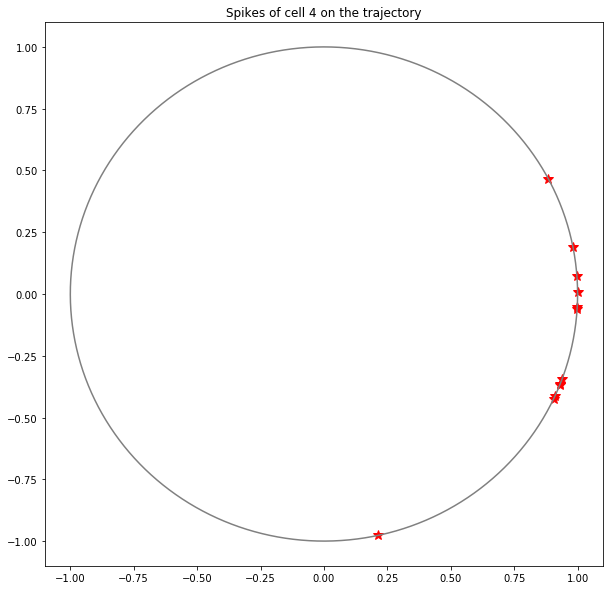

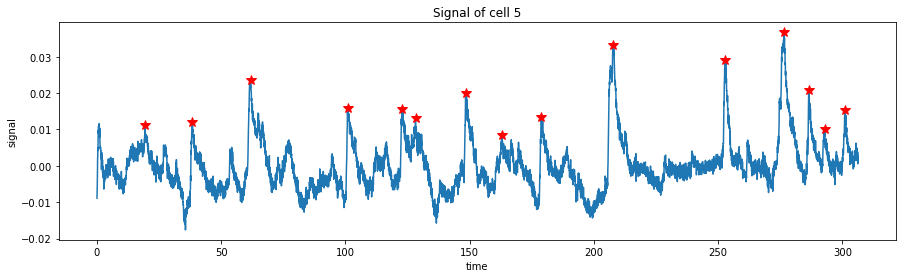

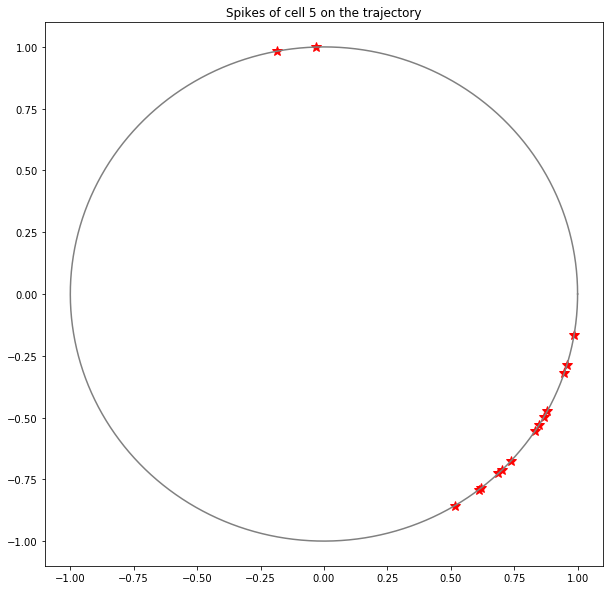

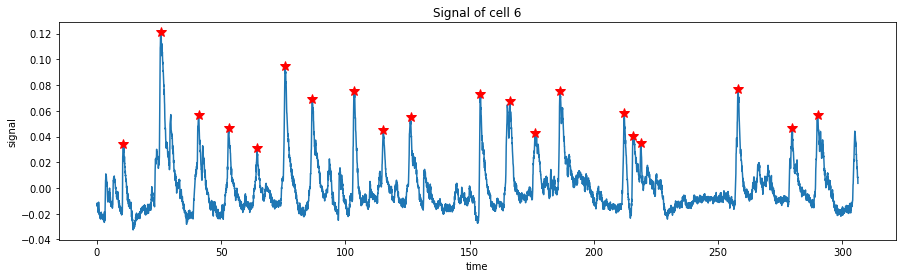

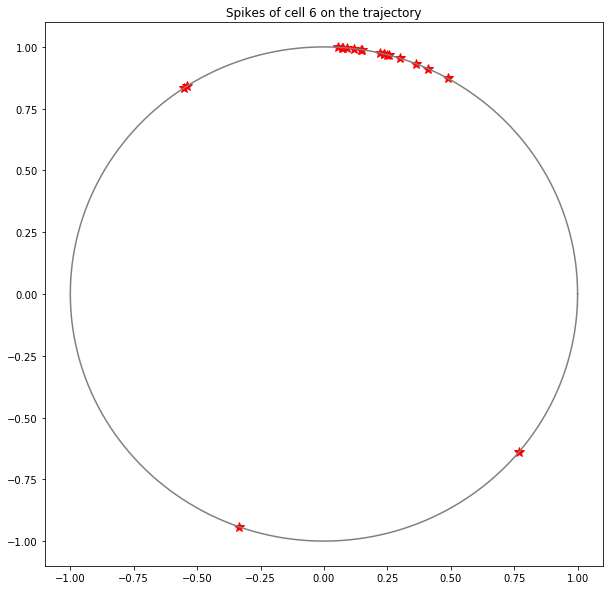

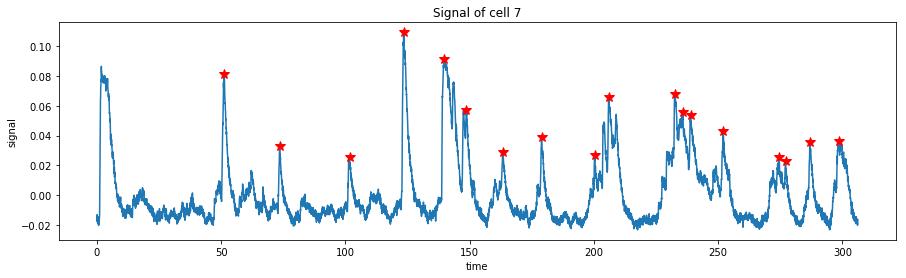

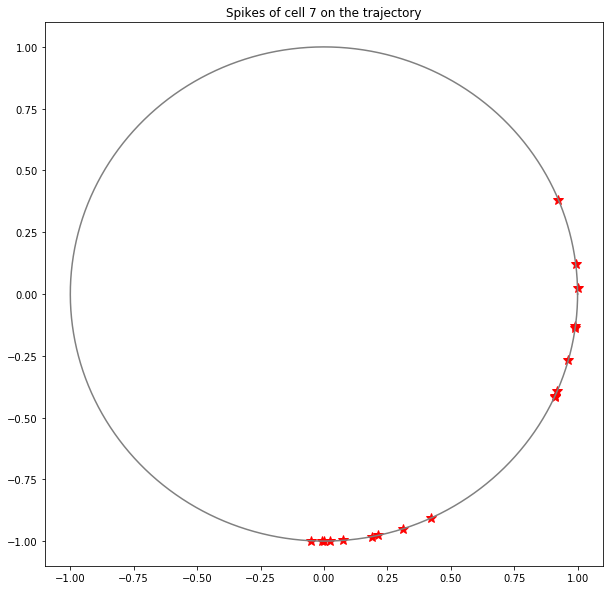

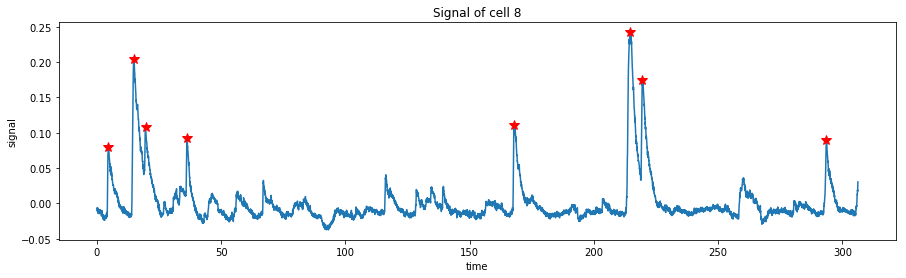

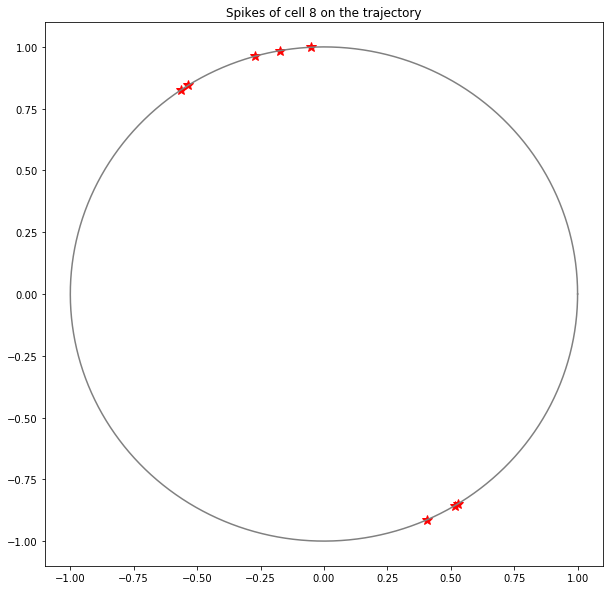

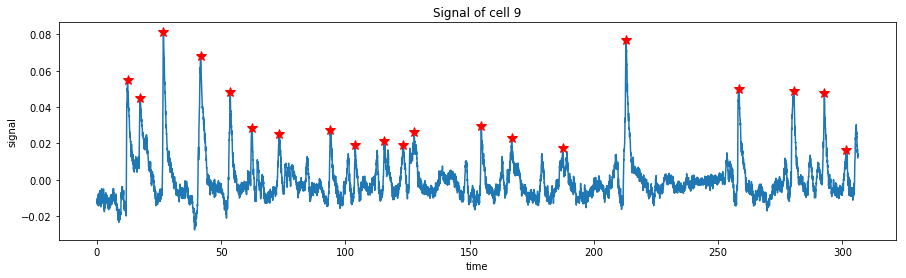

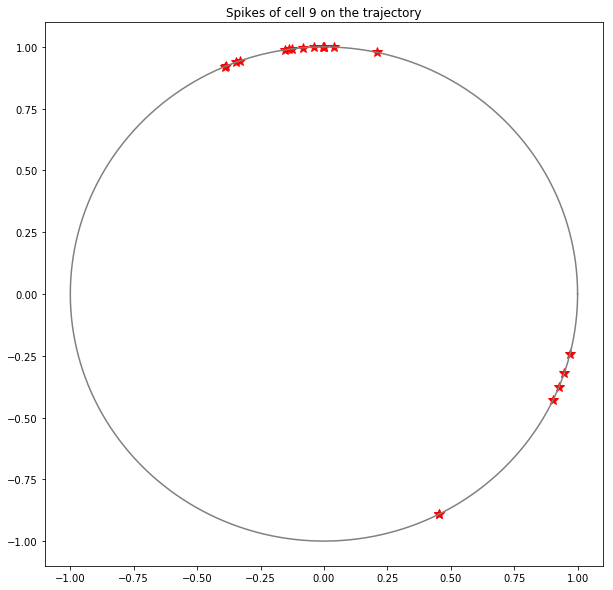

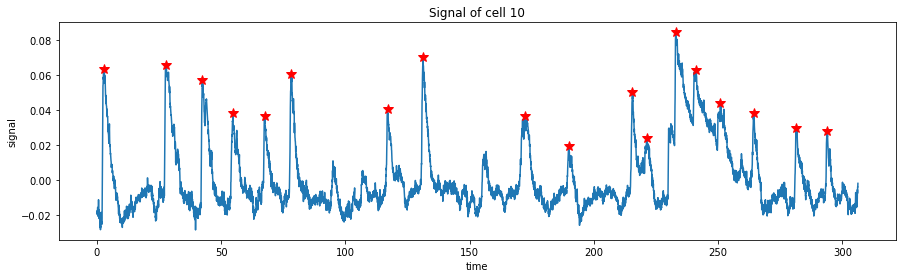

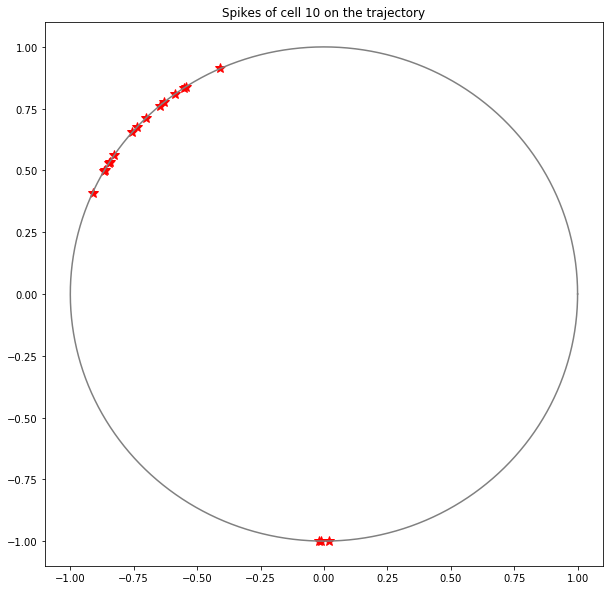

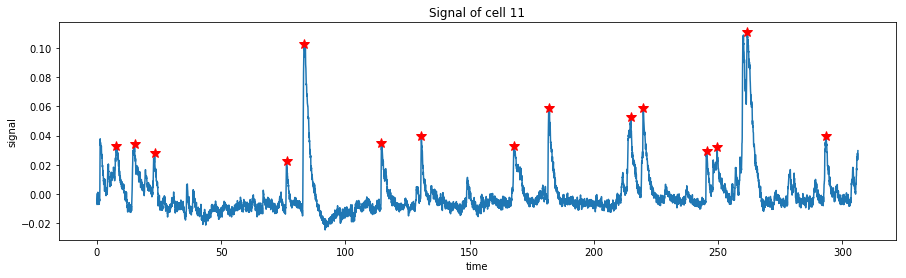

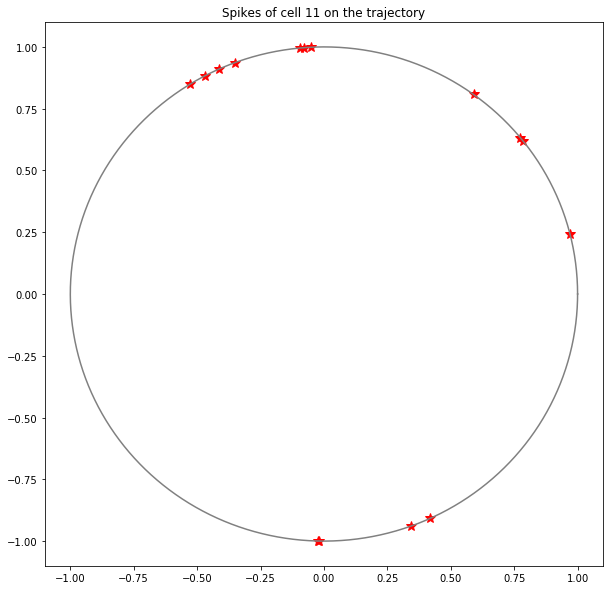

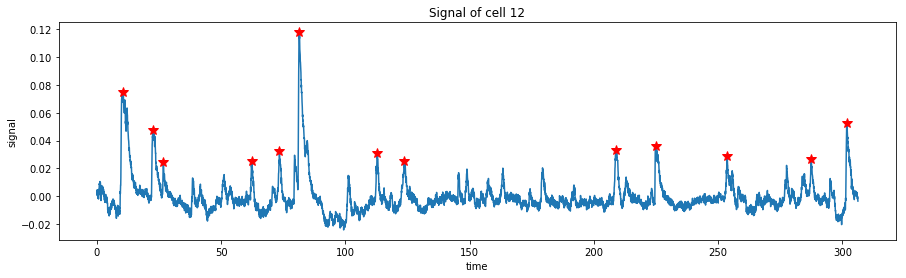

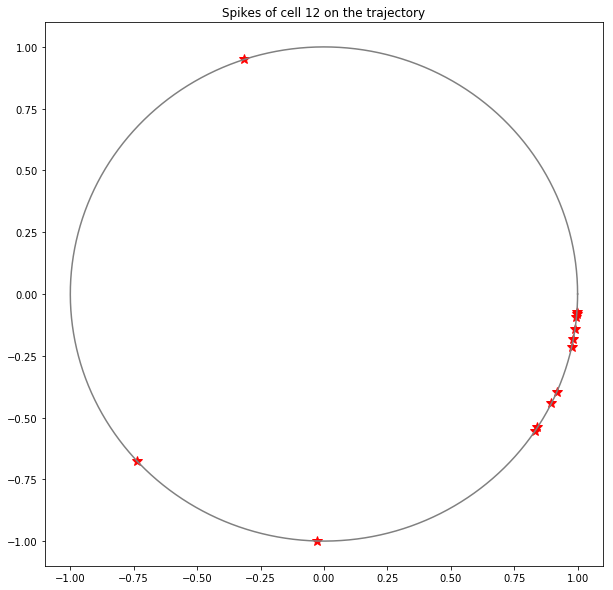

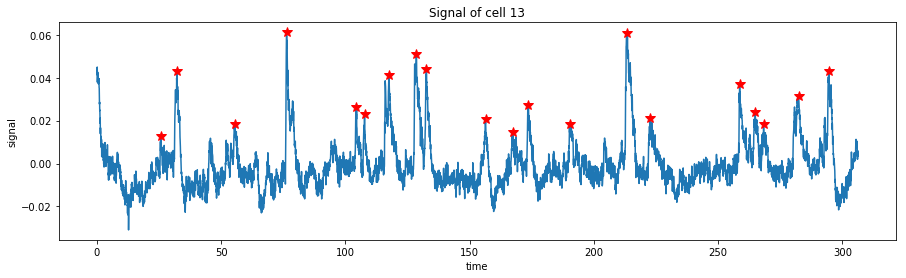

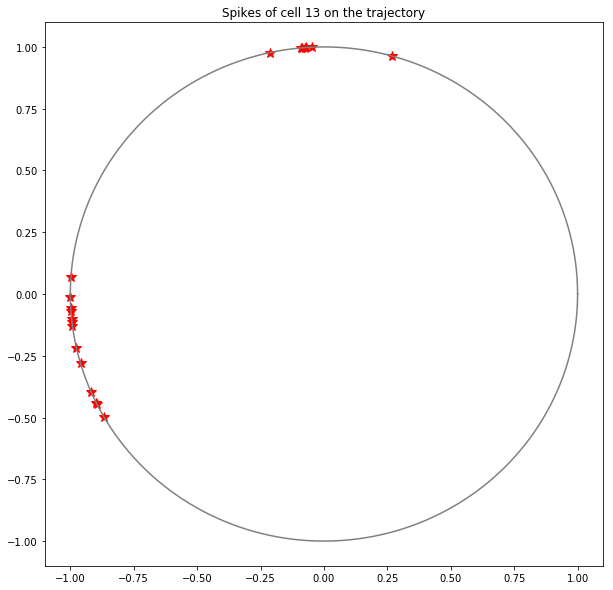

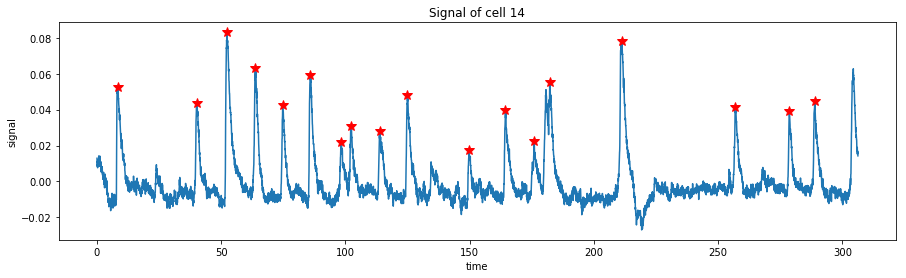

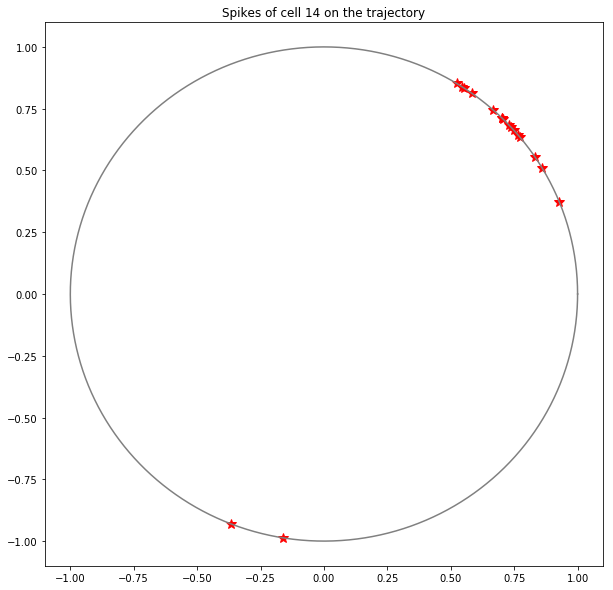

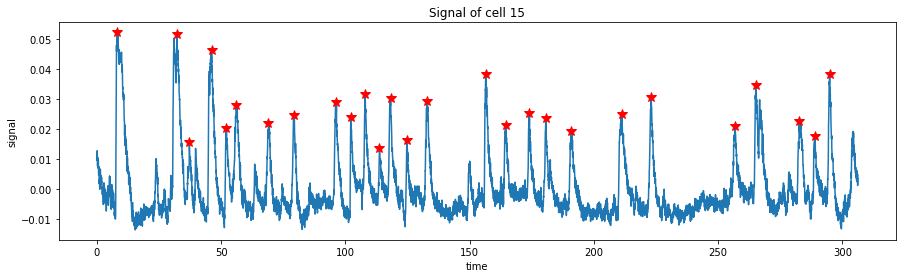

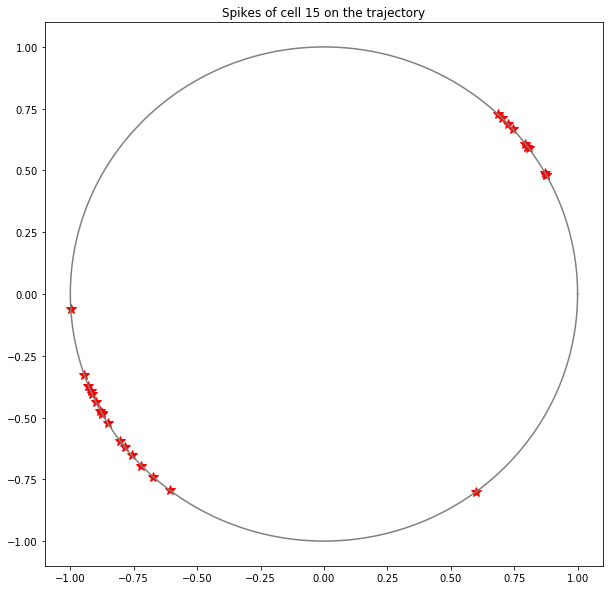

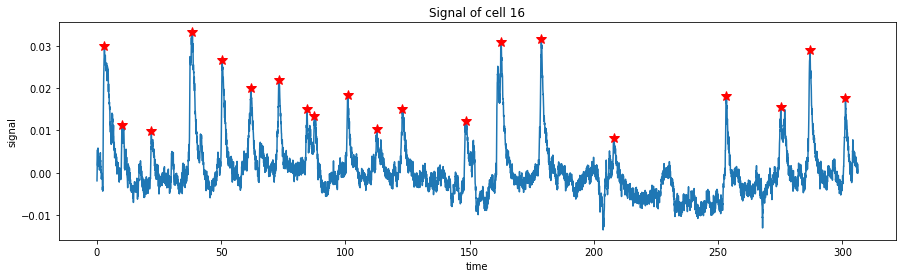

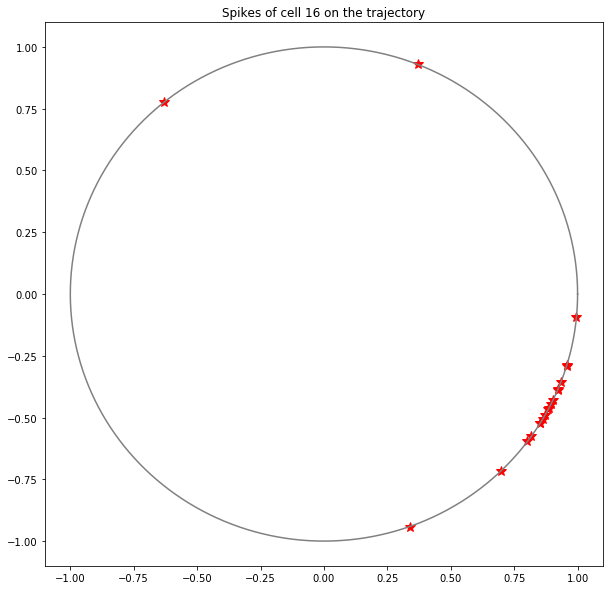

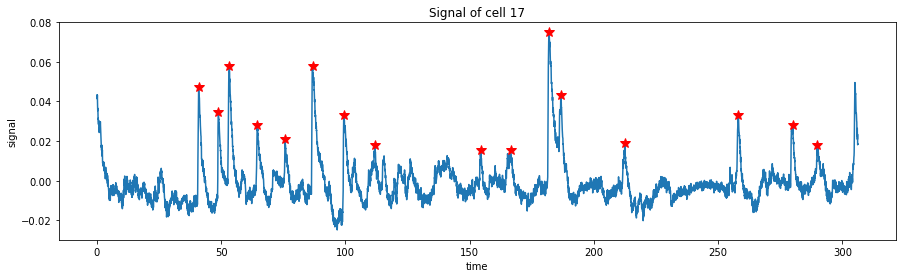

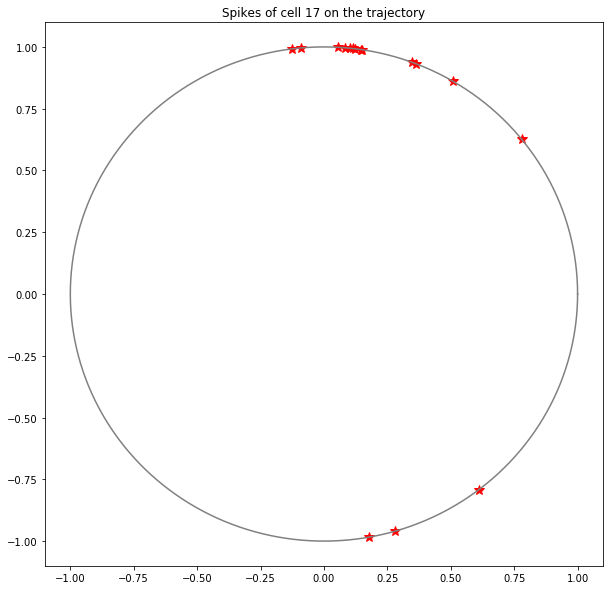

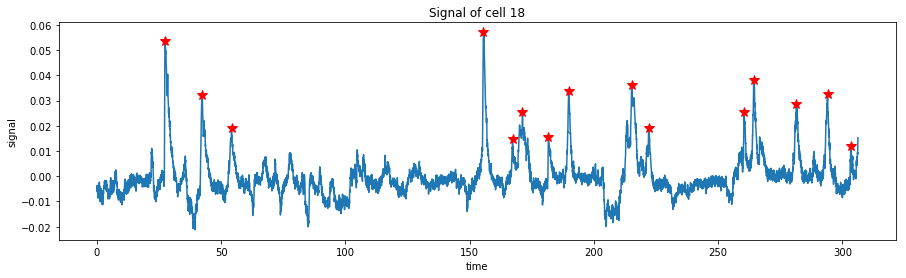

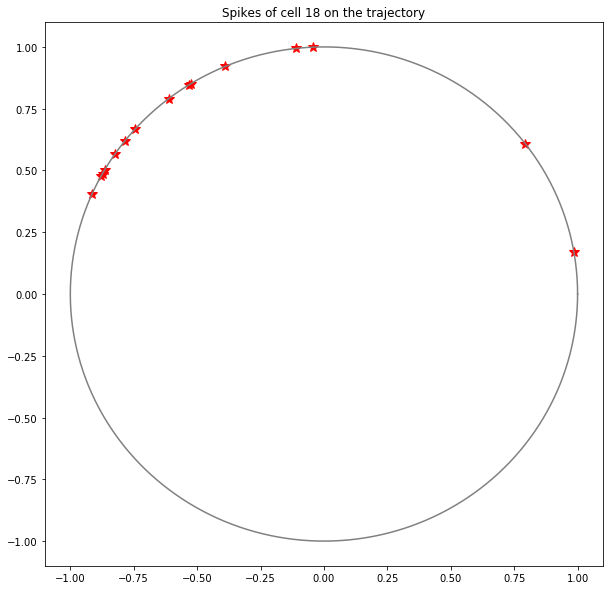

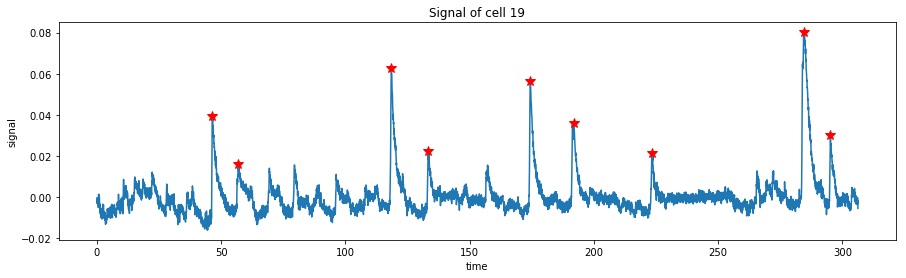

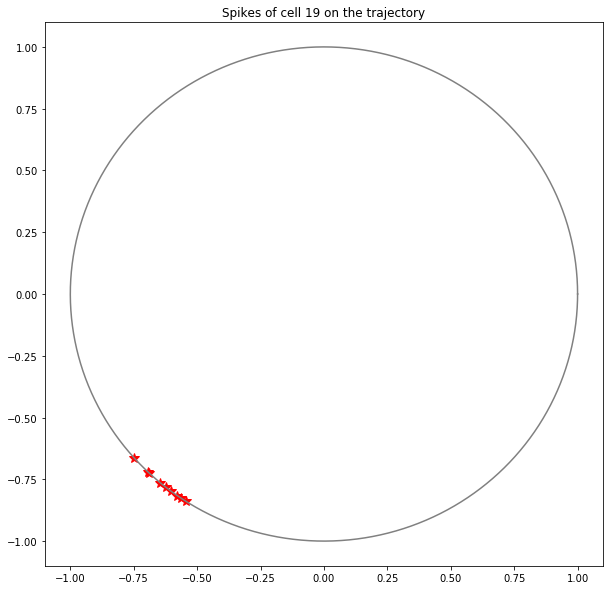

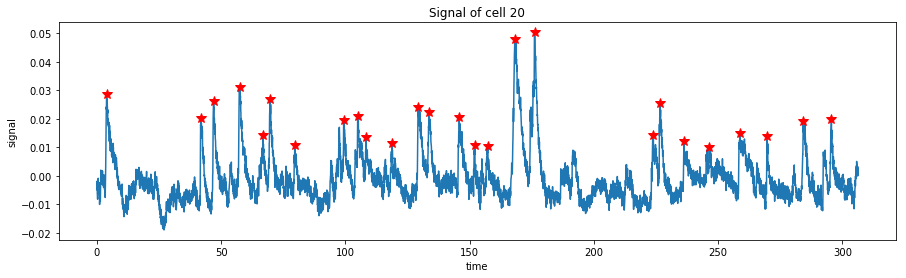

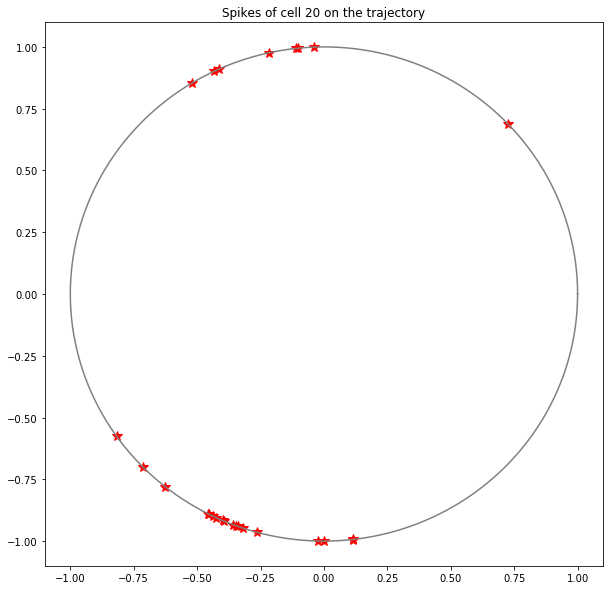

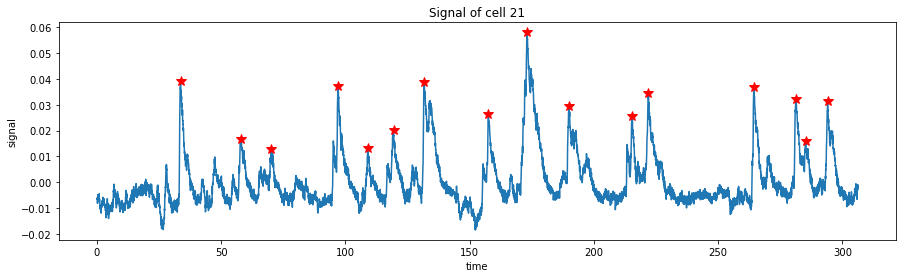

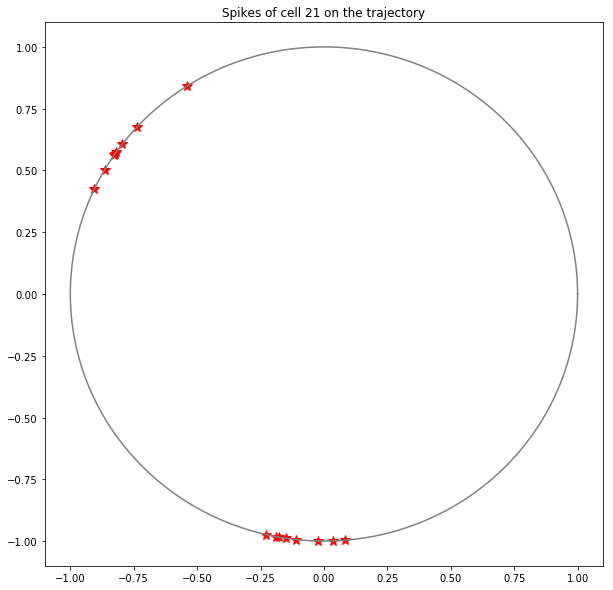

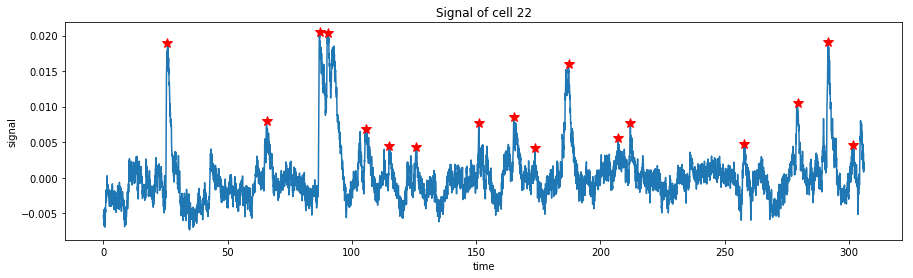

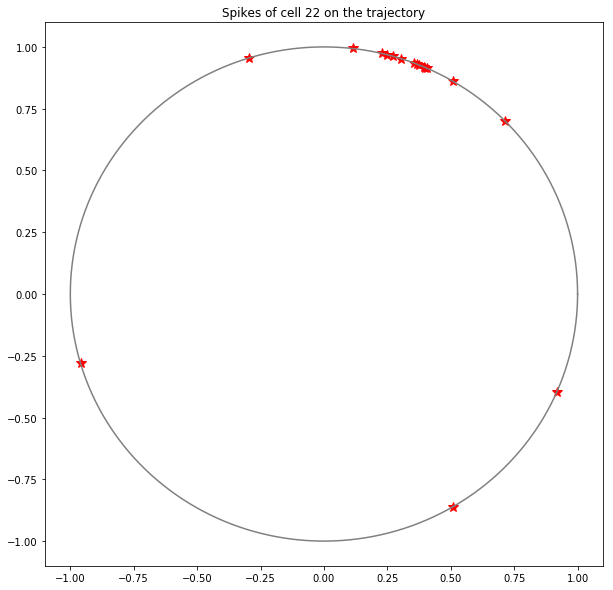

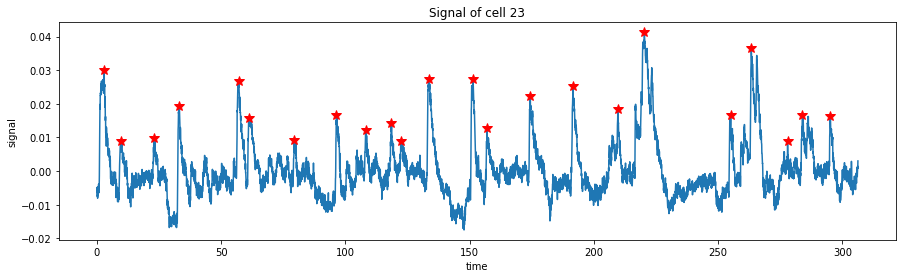

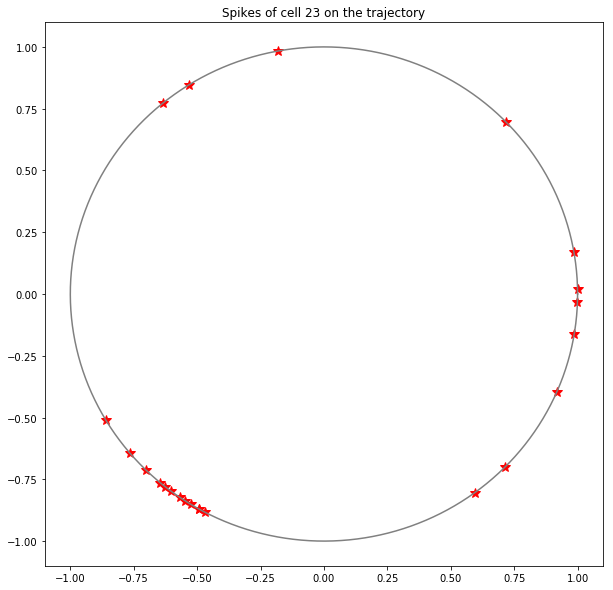

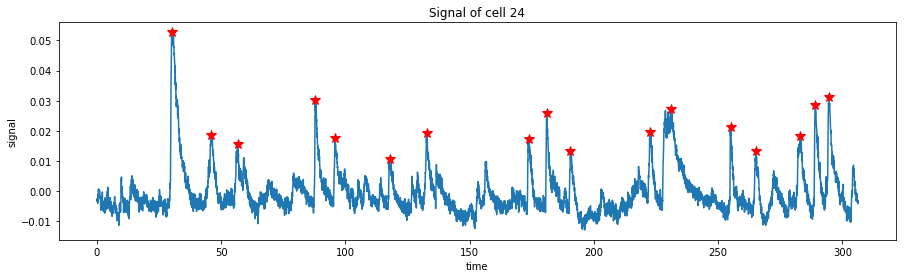

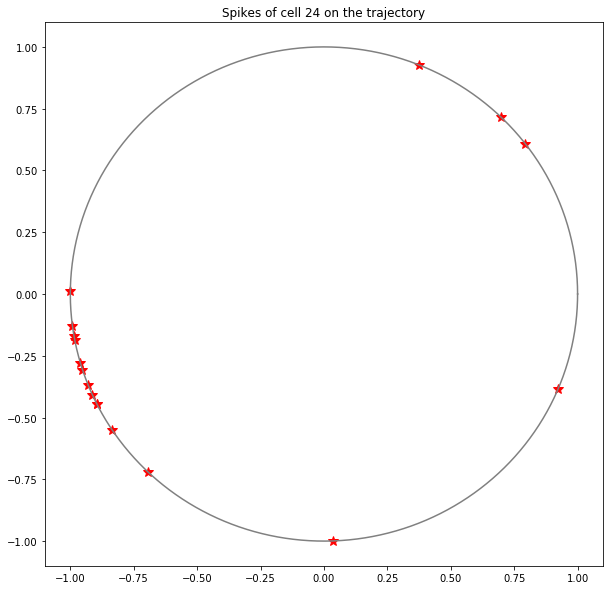

In [8]:
i_list = np.arange(24)
threshold_list = [2,3,2,3,3,2.8,5,3,4,3,3,3,4,3,3,3,4,3,3,3,3,3,2.5,4]
window_list = [70,70,90,50,120,50,190,100,50,50,110,50,130,50,50,70,100,150,50,90,50,70,50,50]

# i_list = np.arange(1)
# threshold_list = [2]
# window_list = [70]

for i, t, w in zip(i_list, threshold_list, window_list):
    
    max_0 = get_max_ind(fine_no_time[:,i])

    # plot signal
    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(track[:,0], fine_no_time[:,i], '-')
    
    for idx in range(len(max_0)):
        point = max_0[idx]                     
        plt.plot(track[point,0], fine_no_time[point, i], 'r*', markersize = 10)
        #plt.text(track[point,0]+0.01, fine_no_time[point, i]+0.001, str(idx), fontsize=9)
        
    plt.title('Signal of cell {}'.format(i+1))
    plt.xlabel('time')
    plt.ylabel('signal')
    
        
    # plot circule
    
    plt.figure(figsize = (10,10))
    
    r = (track[max_0,1] ** 2 + track[max_0,2] ** 2) ** 0.5
    cos = track[max_0,1] / r
    sin = track[max_0,2] / r
    

    for idx in range(len(max_0)):
        plt.plot(cos[idx], sin[idx], 'r*', markersize = 10)
        #plt.text(cos[idx]+0.02, sin[idx]+0.02, str(idx), fontsize = 9)
    plt.plot(x,y, 'grey')
    
    plt.title('Spikes of cell {} on the trajectory'.format(i+1))